- Importando as bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 39)

In [2]:
url = 'https://raw.githubusercontent.com/ryanrodr/ml-heart-disease/main/dados/heart_disease_preprocessed.csv'

df = pd.read_csv(url)

- X são as Features ou características dos dados
- Y é a Label ou variável alvo que queremos generalizar para novos dados

In [3]:
X = df.drop(['target'], axis=1)
y = df['target']

In [4]:
X.shape, y.shape

((1190, 20), (1190,))

- Dividindo os dados em Treino e Teste

In [5]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                                                        y,
                                                        test_size=0.3,
                                                        random_state=123)

In [6]:
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((833, 20), (357, 20), (833,), (357,))

- Instanciando e Treinando o modelo DecisionTreeClassifier

In [7]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_treino, y_treino)

In [8]:
# prevendo um resultado
previsoes = dtc.predict(X_teste)

- Plotando a Árvore de Decisão

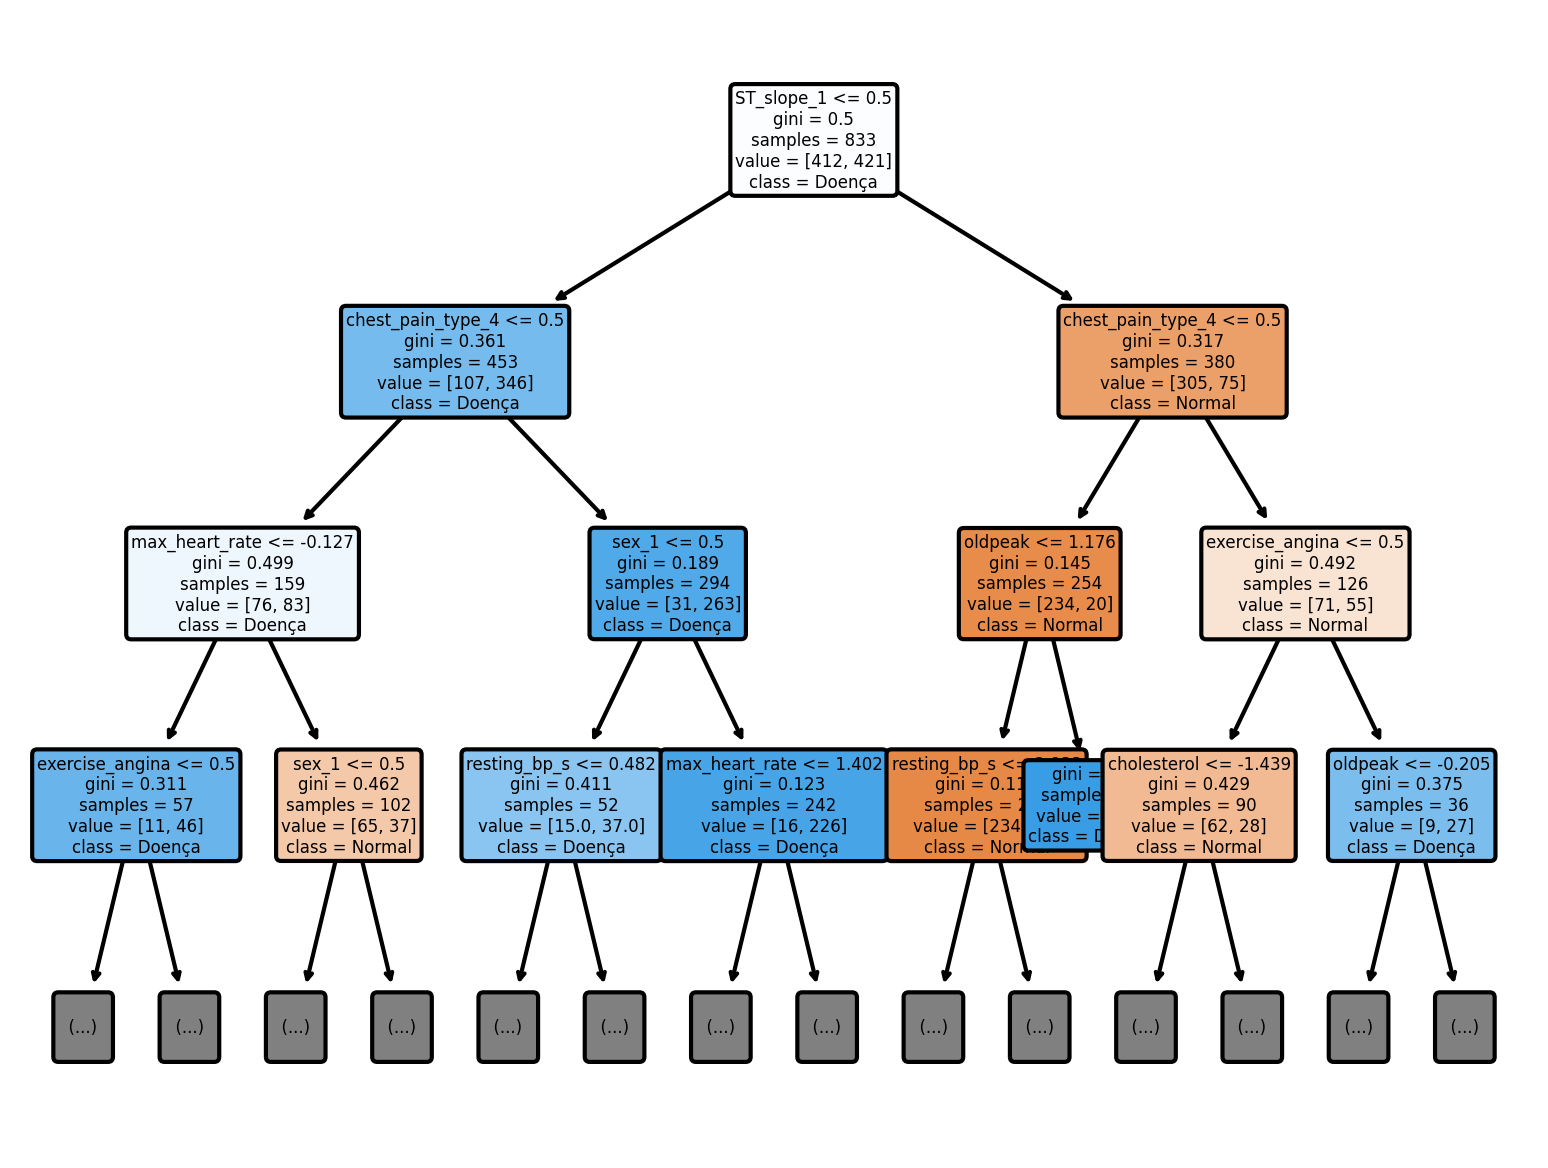

In [9]:
feature_names = [str(name) for name in X.columns]
class_names = {0: 'Normal', 1: 'Doença'}

plt.figure(dpi=300)
plot_tree(dtc,
          class_names=list(class_names.values()),
          feature_names=feature_names,
          filled=True,
          rounded=True,
          fontsize=4,
          max_depth=3)

plt.show()

- Validando o modelo com `classification_report`

In [10]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       149
           1       0.90      0.88      0.89       208

    accuracy                           0.88       357
   macro avg       0.87      0.88      0.87       357
weighted avg       0.88      0.88      0.88       357



- Validando o modelo com `accuracy_score`

In [11]:
acuracia = accuracy_score(y_teste, previsoes)
print("Acurácia do modelo DecisionTreeClassifier - %.2f%%" % (acuracia * 100))

Acurácia do modelo DecisionTreeClassifier - 87.68%


- Validando o modelo `confusion_matrix`

In [12]:
matriz = confusion_matrix(y_teste, previsoes)
print(confusion_matrix(y_teste, previsoes))

[[129  20]
 [ 24 184]]


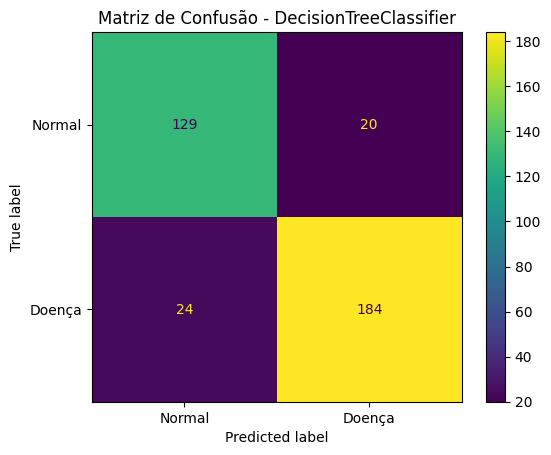

In [13]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['Normal', 'Doença'])
visualizacao.plot()

plt.title("Matriz de Confusão - DecisionTreeClassifier");